<a href="https://colab.research.google.com/github/Shaurya2127/practice_projects/blob/main/bank.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

df = pd.read_csv('Bank_Churn.csv')

In [2]:
df = df.drop(columns=['Surname', 'CustomerId'])

print("Missing values per column:\n", df.isnull().sum())

df.drop_duplicates(inplace=True)
print(f"Number of rows after removing duplicates: {len(df)}")

Missing values per column:
 CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64
Number of rows after removing duplicates: 10000


In [3]:
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df_filtered = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df_filtered

df = remove_outliers_iqr(df, 'CreditScore')
print(f"Number of rows after removing outliers in CreditScore: {len(df)}")
df = remove_outliers_iqr(df, 'Age')
print(f"Number of rows after removing outliers in Age: {len(df)}")
df = remove_outliers_iqr(df, 'Tenure')
print(f"Number of rows after removing outliers in Tenure: {len(df)}")
df = remove_outliers_iqr(df, 'Balance')
print(f"Number of rows after removing outliers in Balance: {len(df)}")
df = remove_outliers_iqr(df, 'NumOfProducts')
print(f"Number of rows after removing outliers in NumOfProducts: {len(df)}")
df = remove_outliers_iqr(df, 'EstimatedSalary')
print(f"Number of rows after removing outliers in EstimatedSalary: {len(df)}")



Number of rows after removing outliers in CreditScore: 9985
Number of rows after removing outliers in Age: 9626
Number of rows after removing outliers in Tenure: 9626
Number of rows after removing outliers in Balance: 9626
Number of rows after removing outliers in NumOfProducts: 9568
Number of rows after removing outliers in EstimatedSalary: 9568


In [4]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

# Separate numerical and categorical features
numerical_features = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']
categorical_features = ['Geography', 'Gender', 'HasCrCard', 'IsActiveMember']

# Create transformers
numerical_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

# Combine transformers using ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])


# Fit and transform the data
scaled_data = preprocessor.fit_transform(df)

feature_names = numerical_features + list(preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_features))
scaled_df = pd.DataFrame(scaled_data, columns = feature_names)

print(scaled_df.head())


   CreditScore       Age    Tenure   Balance  NumOfProducts  EstimatedSalary  \
0    -0.329808  0.485534 -1.044203 -1.224651      -0.938614         0.021813   
1    -0.444286  0.371671 -1.390497  0.118145      -0.938614         0.216419   
2    -1.547436  0.485534  1.033562  1.333486       2.699489         0.240567   
3     0.502758  0.143947 -1.390497 -1.224651       0.880438        -0.108963   
4     2.074226  0.599396 -1.044203  0.786324      -0.938614        -0.365266   

   Geography_France  Geography_Germany  Geography_Spain  Gender_Female  \
0               1.0                0.0              0.0            1.0   
1               0.0                0.0              1.0            1.0   
2               1.0                0.0              0.0            1.0   
3               1.0                0.0              0.0            1.0   
4               0.0                0.0              1.0            1.0   

   Gender_Male  HasCrCard_0  HasCrCard_1  IsActiveMember_0  IsActiveMember

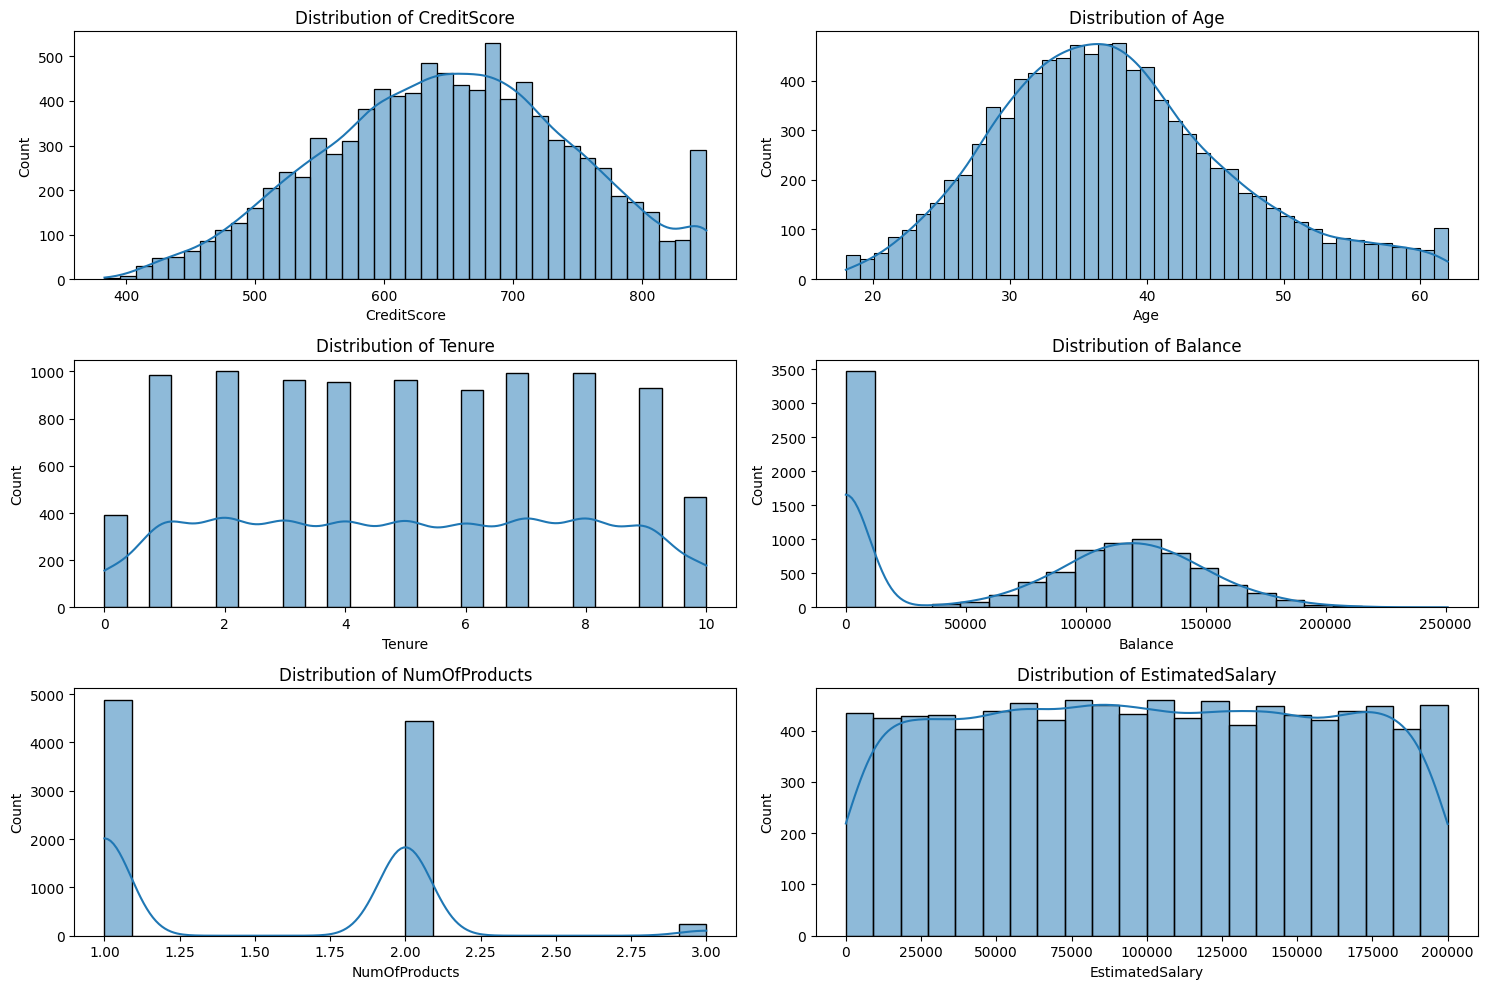

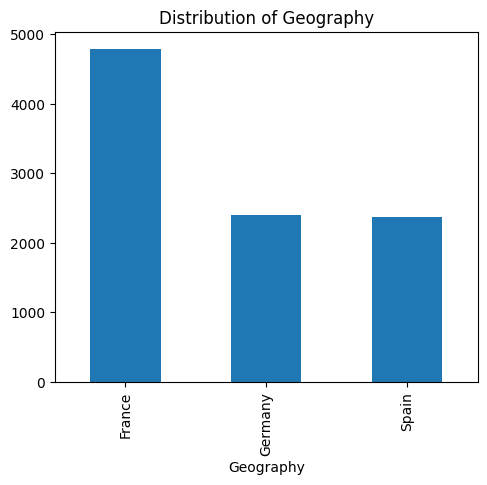

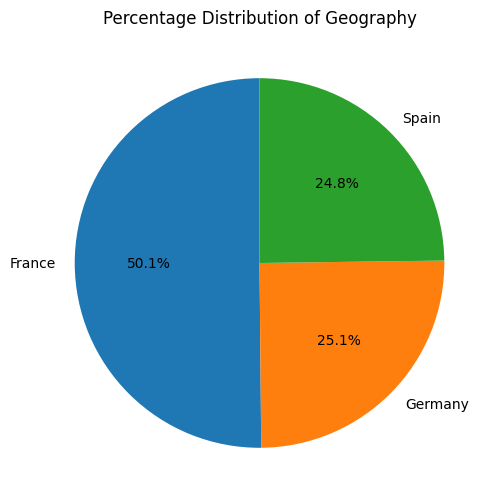

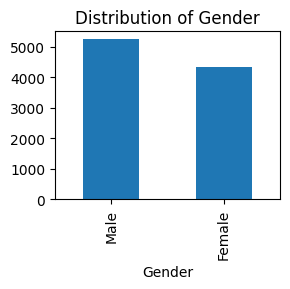

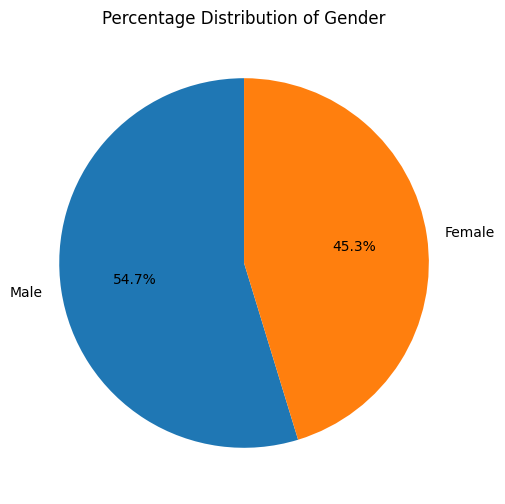

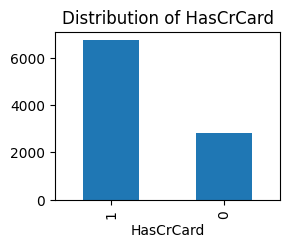

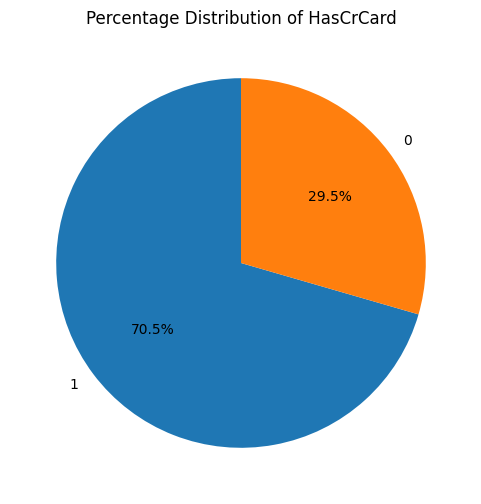

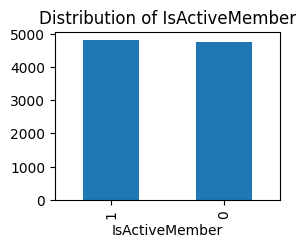

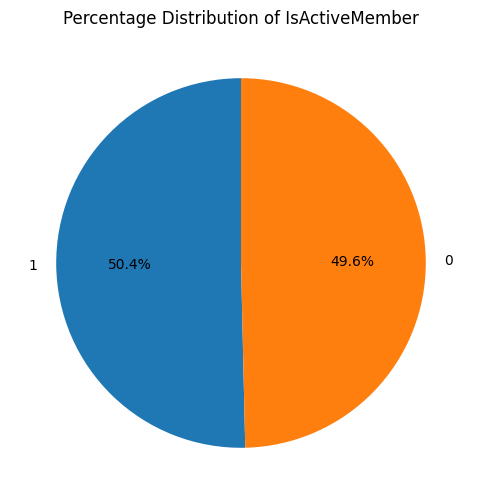

<Figure size 640x480 with 0 Axes>

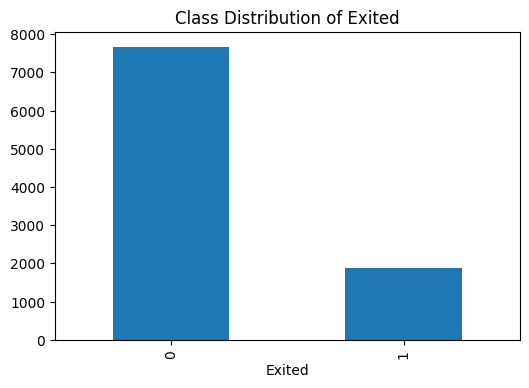

Percentage of churned customers: 19.76%


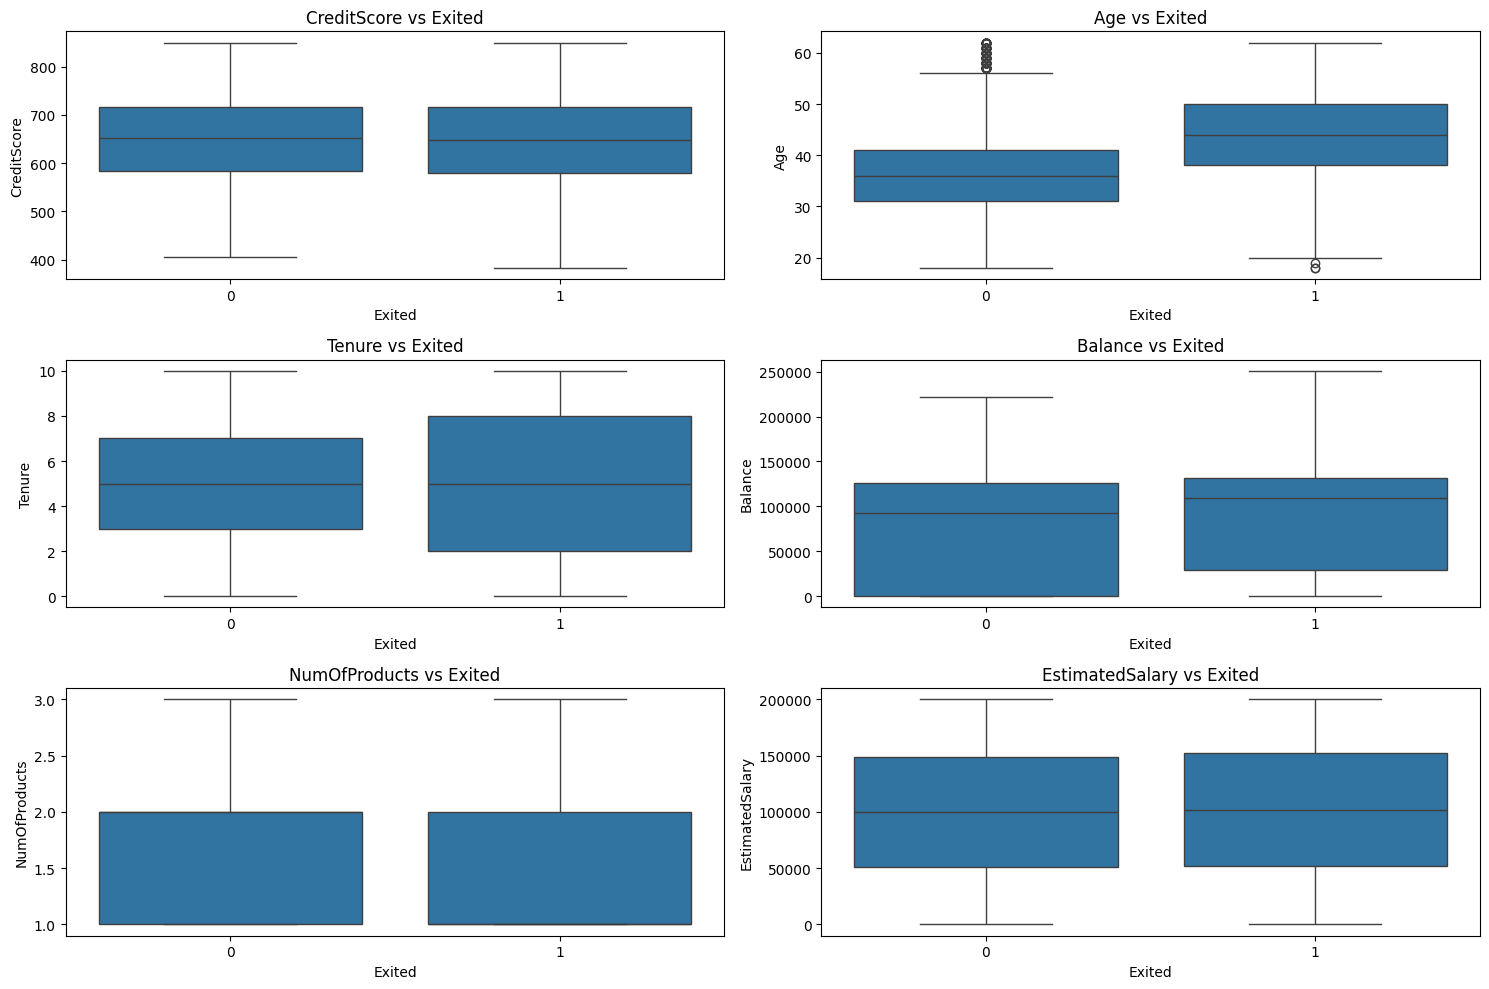

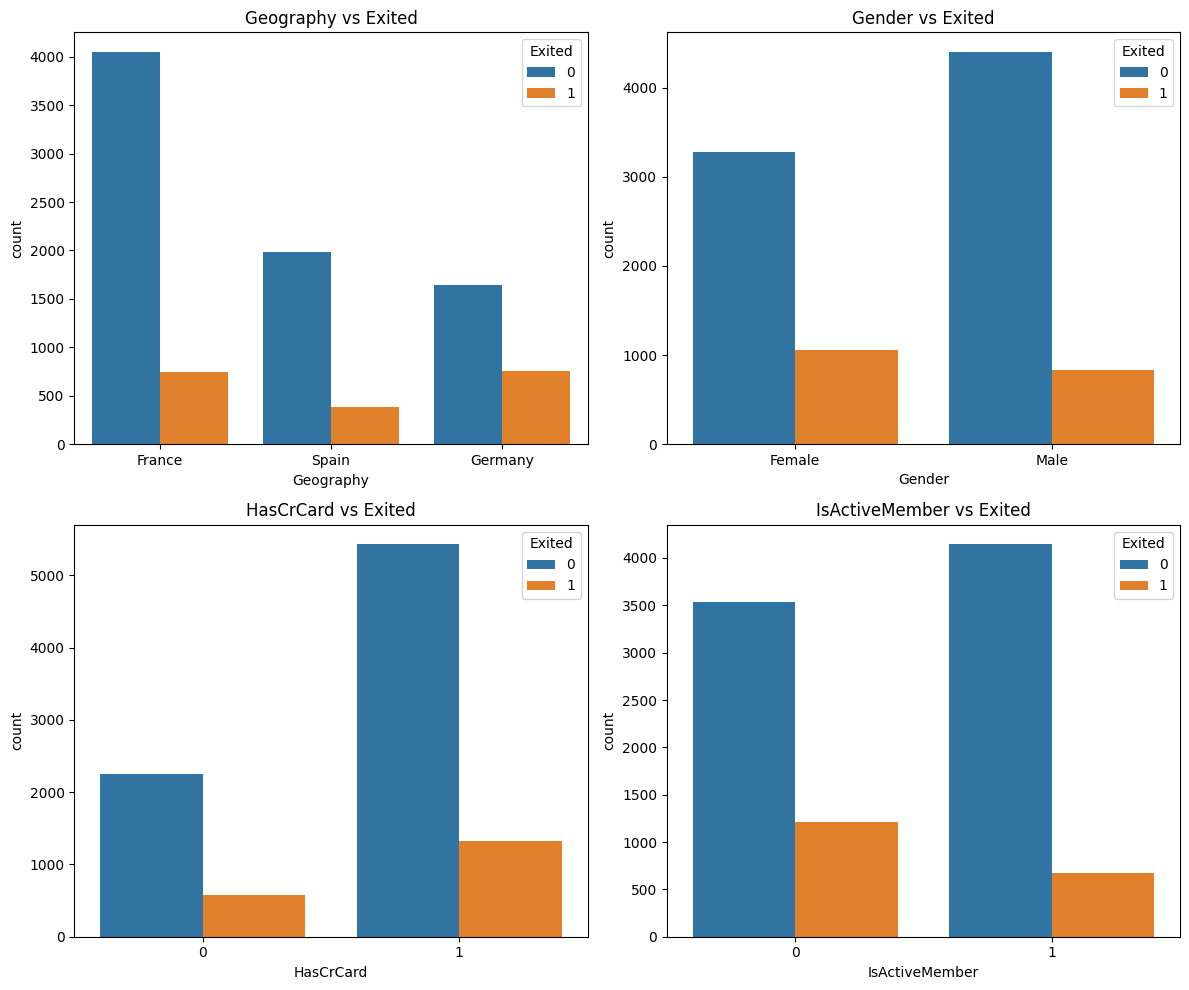

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Analyze numerical features
numerical_features = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_features):
    plt.subplot(3, 2, i + 1)
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()


# Analyze categorical features
categorical_features = ['Geography', 'Gender', 'HasCrCard', 'IsActiveMember']
plt.figure(figsize=(12, 10))
for i, col in enumerate(categorical_features):
    plt.subplot(2, 2, i + 1)
    df[col].value_counts().plot(kind='bar')
    plt.title(f'Distribution of {col}')

        # Pie chart for percentage distribution
    plt.figure(figsize=(6, 6))  # Create a separate figure for pie chart
    df[col].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90)
    plt.title(f'Percentage Distribution of {col}')
    plt.ylabel('')  # Remove y-axis label for pie chart
    plt.show()


plt.tight_layout()
plt.show()

# Class distribution of target variable
plt.figure(figsize=(6, 4))
df['Exited'].value_counts().plot(kind='bar')
plt.title('Class Distribution of Exited')
plt.show()
print(f"Percentage of churned customers: {df['Exited'].value_counts(normalize=True)[1] * 100:.2f}%")

# Relationship between target variable and other features
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_features):
    plt.subplot(3, 2, i + 1)
    sns.boxplot(x='Exited', y=col, data=df)
    plt.title(f'{col} vs Exited')
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 10))
for i, col in enumerate(categorical_features):
    plt.subplot(2, 2, i + 1)
    sns.countplot(x=col, hue='Exited', data=df)
    plt.title(f'{col} vs Exited')
plt.tight_layout()
plt.show()

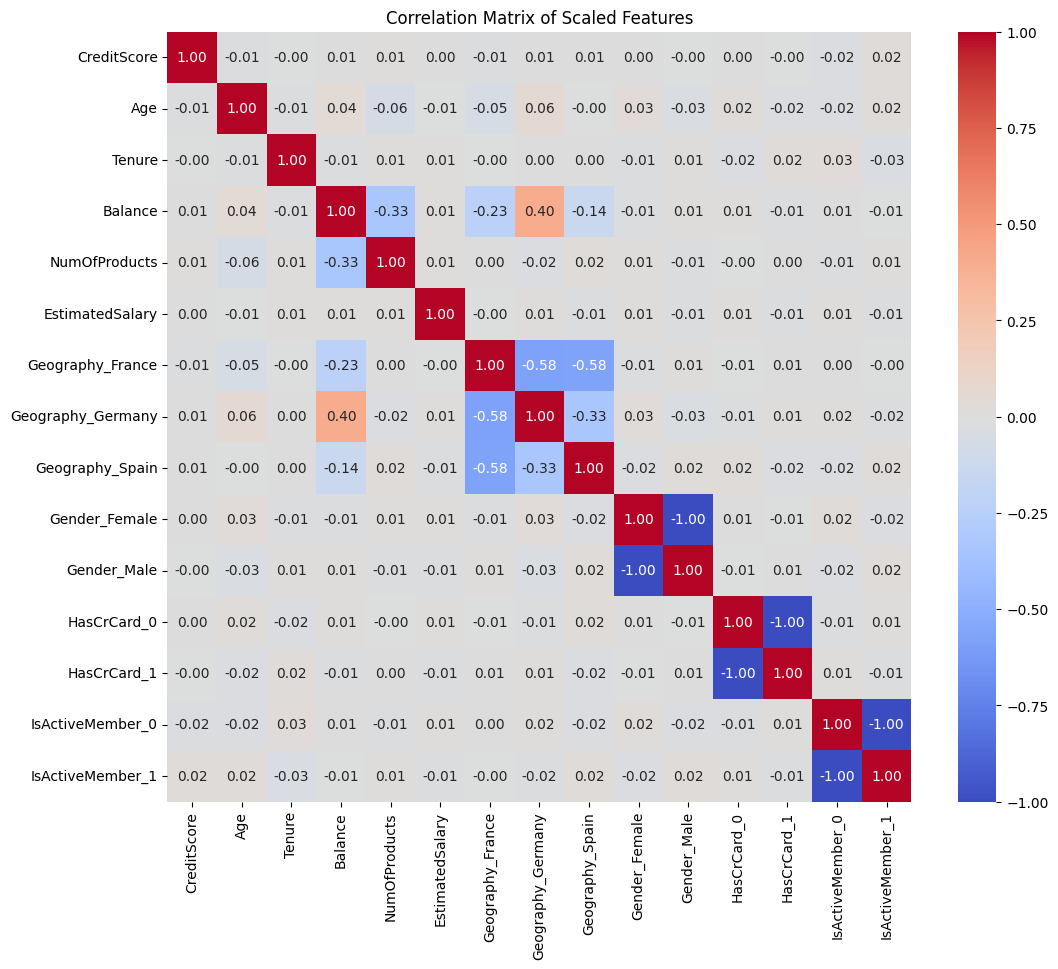

In [6]:
correlation_matrix = scaled_df.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Scaled Features')
plt.show()


In [7]:
from imblearn.over_sampling import SMOTE

X = scaled_df # Features
y = df['Exited'] # Target variable


smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Now X_resampled and y_resampled contain the SMOTE-balanced data
print(y_resampled.value_counts())


Exited
1    7677
0    7677
Name: count, dtype: int64


training model with PCA

In [8]:
import pandas as pd
from sklearn.decomposition import PCA

pca = PCA(n_components=6)
X_pca = pca.fit_transform(X_resampled)
feature_indices = abs(pca.components_).argsort()[:, ::-1][:, :6]

top_feature_indices = sorted(list(set(feature_indices.flatten())))[:6]
selected_features = [scaled_df.columns[i] for i in top_feature_indices]
selected_features


['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']

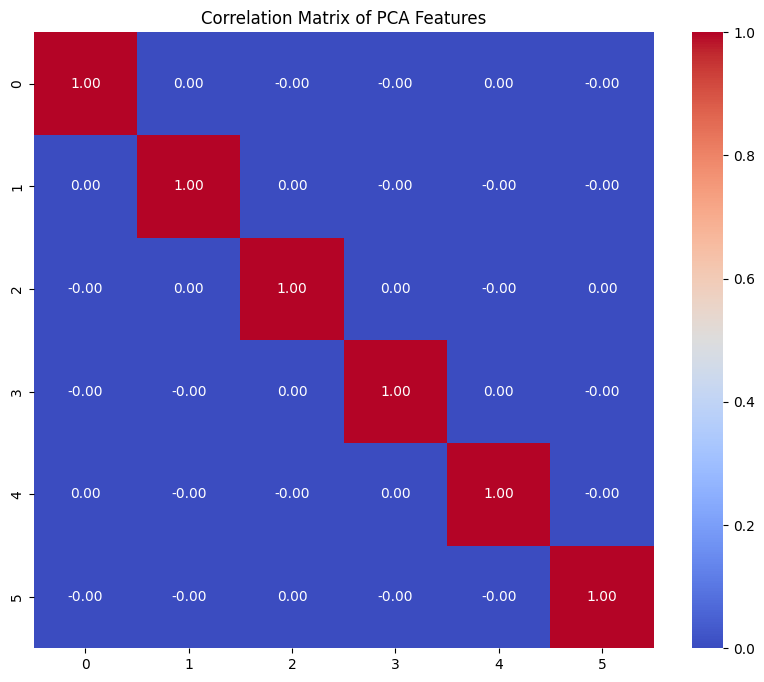

no


In [9]:
correlation_matrix_pca = pd.DataFrame(X_pca).corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix_pca, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of PCA Features')
plt.show()

In [10]:
from sklearn.model_selection import train_test_split

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_pca, y_resampled, test_size=0.2, random_state=42)


In [11]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Initialize models
rf_model = RandomForestClassifier(random_state=42)
svm_model = SVC(random_state=42)
dt_model = DecisionTreeClassifier(random_state=42)
ada_model = AdaBoostClassifier(random_state=42)
lr_model = LogisticRegression(random_state=42)

# Train models
rf_model.fit(X_train, y_train)
svm_model.fit(X_train, y_train)
dt_model.fit(X_train, y_train)
ada_model.fit(X_train, y_train)
lr_model.fit(X_train, y_train)

# Make predictions
rf_pred = rf_model.predict(X_test)
svm_pred = svm_model.predict(X_test)
dt_pred = dt_model.predict(X_test)
ada_pred = ada_model.predict(X_test)
lr_pred = lr_model.predict(X_test)

# Evaluate models
def evaluate_model(model_name, y_true, y_pred):
    print(f"--- {model_name} ---")
    print("Accuracy:", accuracy_score(y_true, y_pred))
    print("Classification Report:\n", classification_report(y_true, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_true, y_pred))


evaluate_model("Random Forest", y_test, rf_pred)
evaluate_model("SVM", y_test, svm_pred)
evaluate_model("Decision Tree", y_test, dt_pred)
evaluate_model("AdaBoost", y_test, ada_pred)
evaluate_model("Logistic Regression", y_test, lr_pred)


--- Random Forest ---
Accuracy: 0.8430478671442527
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.81      0.84      1578
           1       0.81      0.88      0.84      1493

    accuracy                           0.84      3071
   macro avg       0.84      0.84      0.84      3071
weighted avg       0.85      0.84      0.84      3071

Confusion Matrix:
 [[1281  297]
 [ 185 1308]]
--- SVM ---
Accuracy: 0.755454249430153
Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.75      0.76      1578
           1       0.74      0.77      0.75      1493

    accuracy                           0.76      3071
   macro avg       0.76      0.76      0.76      3071
weighted avg       0.76      0.76      0.76      3071

Confusion Matrix:
 [[1176  402]
 [ 349 1144]]
--- Decision Tree ---
Accuracy: 0.7622924128948225
Classification Report:
               precision    recall  f1-sc

In [12]:
from sklearn.model_selection import cross_val_score
def perform_cross_validation(model, X, y, cv=5):
    scores = cross_val_score(model, X, y, cv=cv, scoring='accuracy')
    print(f"Cross-validation scores: {scores}")
    print(f"Average cross-validation score: {scores.mean()}")
perform_cross_validation(rf_model, X_pca, y_resampled)
perform_cross_validation(svm_model, X_pca, y_resampled)
perform_cross_validation(dt_model, X_pca, y_resampled)
perform_cross_validation(ada_model, X_pca, y_resampled)
perform_cross_validation(lr_model, X_pca, y_resampled)


Cross-validation scores: [0.84532725 0.84532725 0.84207099 0.84662976 0.84397394]
Average cross-validation score: 0.8446658400482818
Cross-validation scores: [0.76619993 0.78215565 0.77596874 0.76652556 0.76970684]
Average cross-validation score: 0.7721113452842977
Cross-validation scores: [0.78443504 0.7645718  0.76782807 0.77010746 0.78175896]
Average cross-validation score: 0.7737402643411042
Cross-validation scores: [0.73982416 0.73168349 0.74014979 0.73721915 0.73387622]
Average cross-validation score: 0.7365505617858351
Cross-validation scores: [0.71084337 0.70563334 0.70726148 0.71182025 0.70944625]
Average cross-validation score: 0.7090009408175885


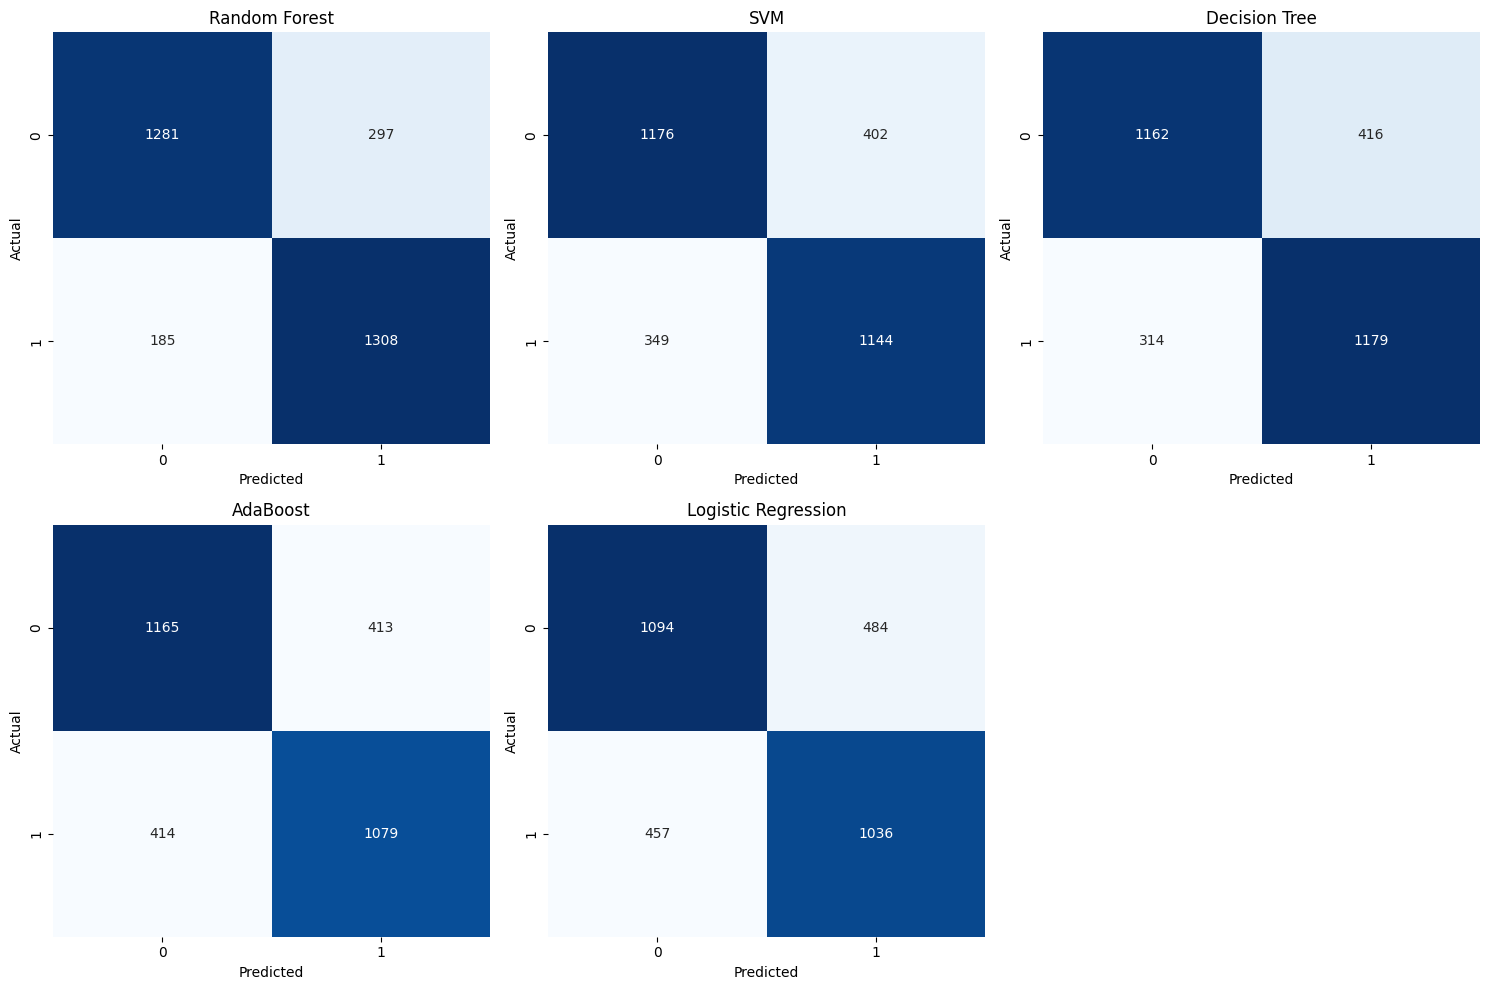

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
models = ['Random Forest', 'SVM', 'Decision Tree', 'AdaBoost', 'Logistic Regression']
predictions = [rf_pred, svm_pred, dt_pred, ada_pred, lr_pred]


plt.figure(figsize=(15, 10))
for i, (model, pred) in enumerate(zip(models, predictions)):
  cm = confusion_matrix(y_test, pred)
  plt.subplot(2, 3, i + 1)
  sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
  plt.title(model)
  plt.xlabel('Predicted')
  plt.ylabel('Actual')
plt.tight_layout()
plt.show()


In [14]:
models = {
    'Random Forest': rf_pred,
    'SVM': svm_pred,
    'Decision Tree': dt_pred,
    'AdaBoost': ada_pred,
    'Logistic Regression': lr_pred
}

best_model = None
best_accuracy = 0

for model_name, predictions in models.items():
    accuracy = accuracy_score(y_test, predictions)
    print(f"{model_name}: Accuracy = {accuracy}")
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_model = model_name

print(f"\nBest performing model: {best_model} with accuracy: {best_accuracy}")


Random Forest: Accuracy = 0.8430478671442527
SVM: Accuracy = 0.755454249430153
Decision Tree: Accuracy = 0.7622924128948225
AdaBoost: Accuracy = 0.7307066102246825
Logistic Regression: Accuracy = 0.6935851514164767

Best performing model: Random Forest with accuracy: 0.8430478671442527


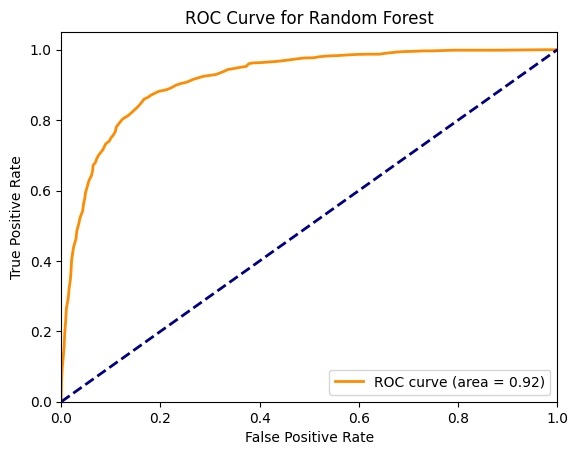

In [15]:
from sklearn.metrics import roc_curve, auc

if best_model == 'Random Forest':
    best_model_probs = rf_model.predict_proba(X_test)[:, 1]
elif best_model == 'SVM':
    best_model_probs = svm_model.predict_proba(X_test)[:, 1] #predict_proba may not be directly available for SVC. Consider using decision_function instead
elif best_model == 'Decision Tree':
    best_model_probs = dt_model.predict_proba(X_test)[:, 1]
elif best_model == 'AdaBoost':
    best_model_probs = ada_model.predict_proba(X_test)[:, 1]
elif best_model == 'Logistic Regression':
    best_model_probs = lr_model.predict_proba(X_test)[:, 1]
else:
    print("Best model not found.")
    best_model_probs = None

if best_model_probs is not None:
  fpr, tpr, thresholds = roc_curve(y_test, best_model_probs)
  roc_auc = auc(fpr, tpr)

  plt.figure()
  plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
  plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
  plt.xlim([0.0, 1.0])
  plt.ylim([0.0, 1.05])
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.title(f'ROC Curve for {best_model}')
  plt.legend(loc="lower right")
  plt.show()


In [16]:
from sklearn.metrics import accuracy_score

# Evaluating the best model on training and testing sets
train_accuracy = accuracy_score(y_train, rf_model.predict(X_train))
test_accuracy = accuracy_score(y_test, rf_pred)

print(f"Training Accuracy of Best Model: {train_accuracy}")
print(f"Testing Accuracy of Best Model: {test_accuracy}")

# Check for overfitting
if train_accuracy - test_accuracy > 0.1 : # Define a threshold for overfitting (e.g. 0.1)
    print("The best performing model might be overfitting.")
else:
    print("The best performing model does not seem to be overfitting significantly.")


Training Accuracy of Best Model: 1.0
Testing Accuracy of Best Model: 0.8430478671442527
The best performing model might be overfitting.


In [17]:
from sklearn.model_selection import cross_val_score, KFold

# Use 5-fold cross validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(rf_model, X_pca, y_resampled, cv=kf, scoring='accuracy')

print("Cross-validation scores:", cv_scores)
print("Mean cross-validation score:", cv_scores.mean())
print("Standard deviation of cross-validation score:", cv_scores.std())
if cv_scores.std() > 0.05: #Example threshold
    print("The model might be overfitting.")

    #Hyperparameter Tuning
    from sklearn.model_selection import GridSearchCV
    param_grid = {
        'n_estimators': [50, 100, 200],
        'max_depth': [None, 10, 20],
        'min_samples_split': [2, 5, 10]
    }
    grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, scoring='accuracy')
    grid_search.fit(X_train, y_train)
    print(f"Best hyperparameters: {grid_search.best_params_}")
    rf_best = grid_search.best_estimator_ # use the best model

    # Re-evaluate the model
    rf_pred_tuned = rf_best.predict(X_test)
    evaluate_model("Tuned Random Forest", y_test, rf_pred_tuned)

else:
    print("The model does not seem to be overfitting significantly.")


Cross-validation scores: [0.83230218 0.844676   0.84141973 0.84239661 0.85114007]
Mean cross-validation score: 0.8423869189231616
Standard deviation of cross-validation score: 0.006074453628669607
The model does not seem to be overfitting significantly.


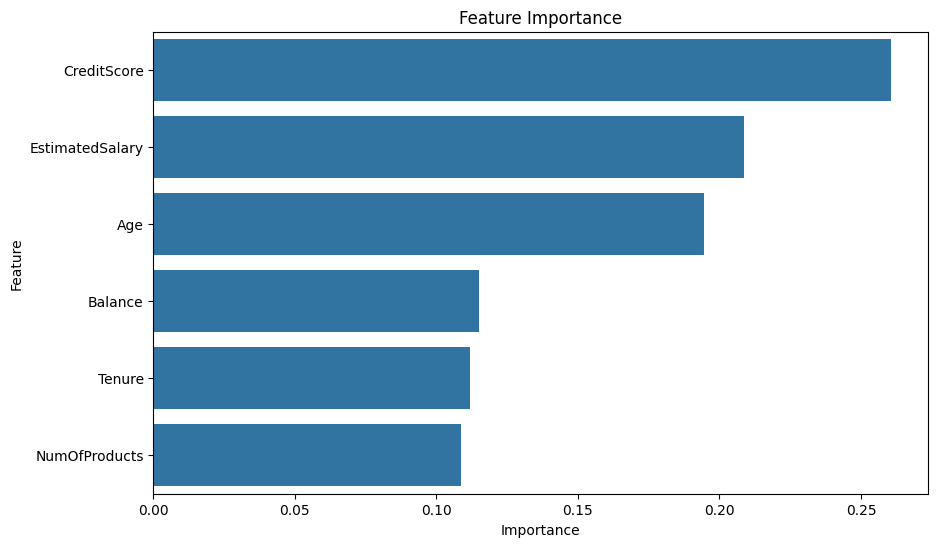

In [24]:
importances = rf_model.feature_importances_
feature_names = selected_features

# Create a DataFrame for better visualization
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()


In [26]:
from sklearn.metrics import precision_score, recall_score, f1_score

models = {
    'Random Forest': rf_pred,
    'SVM': svm_pred,
    'Decision Tree': dt_pred,
    'AdaBoost': ada_pred,
    'Logistic Regression': lr_pred
}

best_model_metrics = {}

for model_name, predictions in models.items():
    precision = precision_score(y_test, predictions)
    recall = recall_score(y_test, predictions)
    f1 = f1_score(y_test, predictions)
    accuracy = accuracy_score(y_test, predictions)

    best_model_metrics[model_name] = {
        "precision": precision,
        "recall": recall,
        "f1_score": f1,
        "accuracy": accuracy
    }
    print(f"{model_name}: Precision = {precision:.4f}, Recall = {recall:.4f}, F1-Score = {f1:.4f}, Accuracy = {accuracy:.4f}")

# Find best model based on each metric
best_precision_model = max(best_model_metrics, key=lambda k: best_model_metrics[k]['precision'])
best_recall_model = max(best_model_metrics, key=lambda k: best_model_metrics[k]['recall'])
best_f1_model = max(best_model_metrics, key=lambda k: best_model_metrics[k]['f1_score'])
best_accuracy_model = max(best_model_metrics, key=lambda k: best_model_metrics[k]['accuracy'])

print(f"\nBest model by Precision: {best_precision_model}")
print(f"Best model by Recall: {best_recall_model}")
print(f"Best model by F1-Score: {best_f1_model}")
print(f"Best model by Accuracy: {best_accuracy_model}")


Random Forest: Precision = 0.8150, Recall = 0.8761, F1-Score = 0.8444, Accuracy = 0.8430
SVM: Precision = 0.7400, Recall = 0.7662, F1-Score = 0.7529, Accuracy = 0.7555
Decision Tree: Precision = 0.7392, Recall = 0.7897, F1-Score = 0.7636, Accuracy = 0.7623
AdaBoost: Precision = 0.7232, Recall = 0.7227, F1-Score = 0.7229, Accuracy = 0.7307
Logistic Regression: Precision = 0.6816, Recall = 0.6939, F1-Score = 0.6877, Accuracy = 0.6936

Best model by Precision: Random Forest
Best model by Recall: Random Forest
Best model by F1-Score: Random Forest
Best model by Accuracy: Random Forest
